In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("dataset.csv",sep=";")

In [3]:
dataset.drop(["node"],inplace=True,axis=1)

In [4]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [6]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [7]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [8]:
test=dataset.query("date.dt.year==2022")

In [9]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [10]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [11]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [12]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [13]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

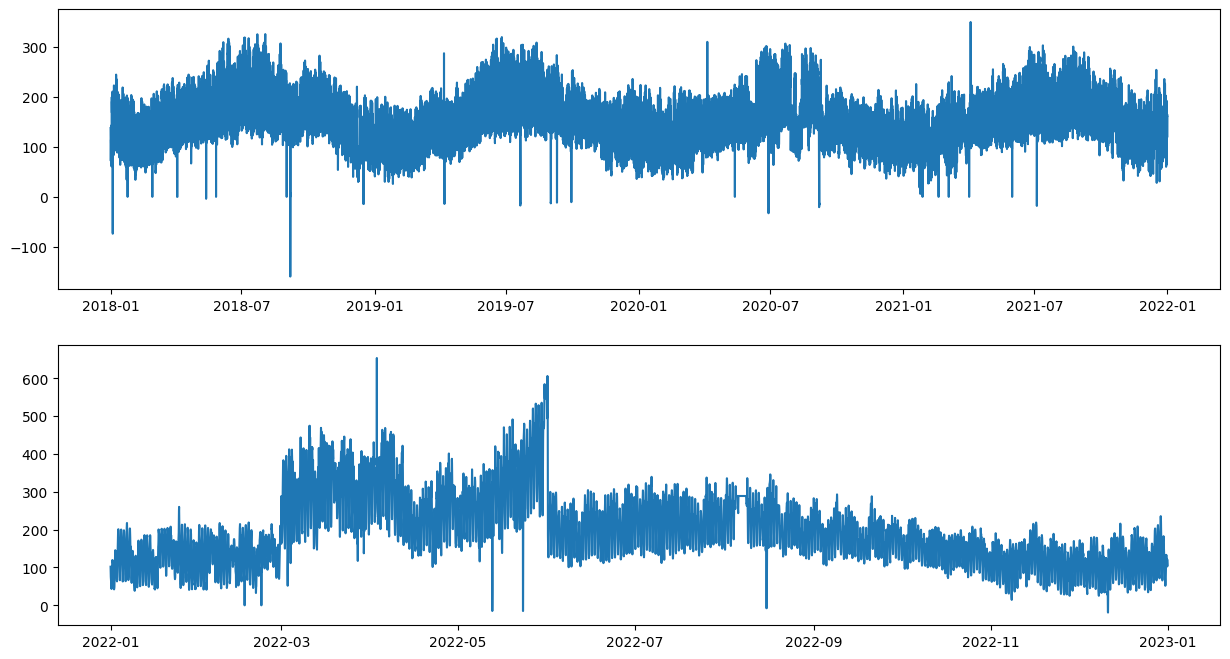

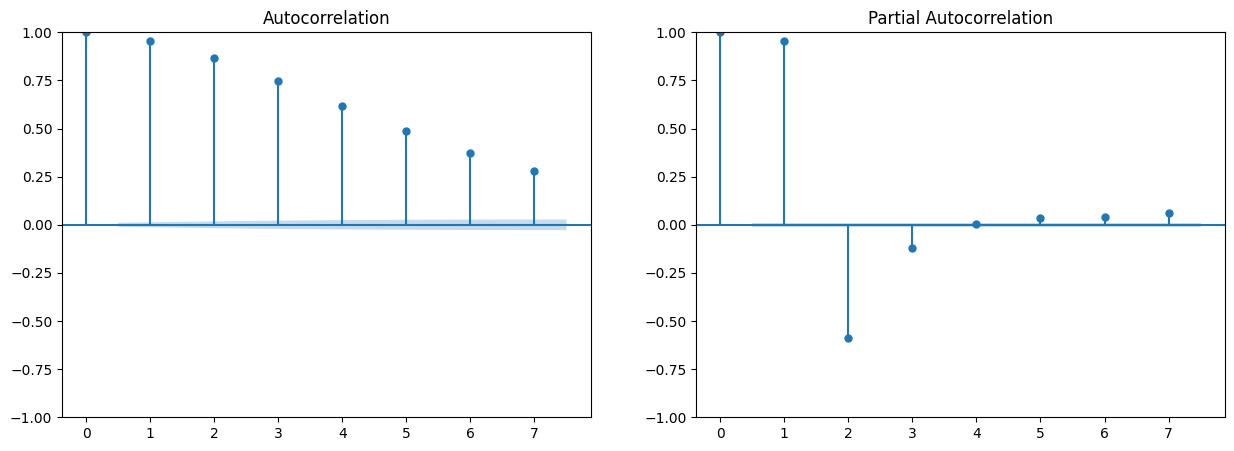

In [14]:
subestacion="AJAHUEL"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

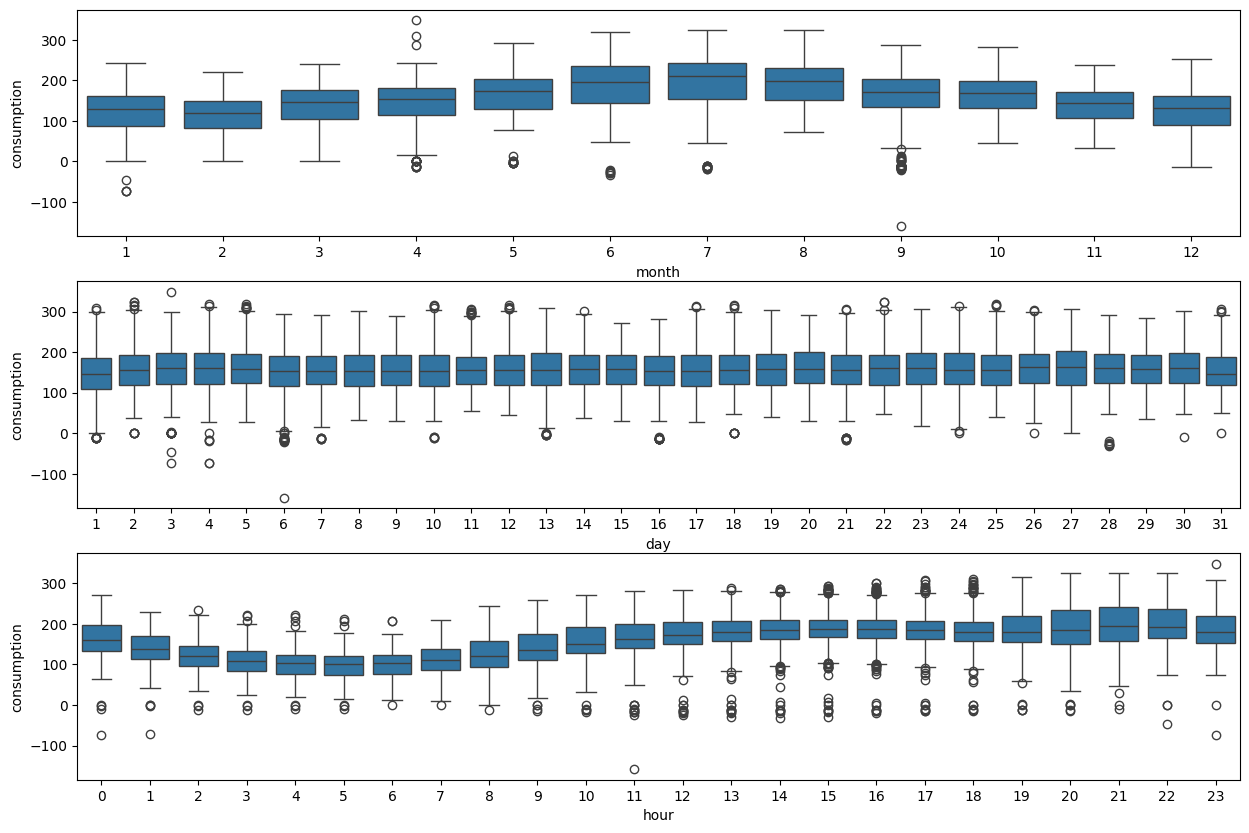

In [15]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [16]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


In [17]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [18]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

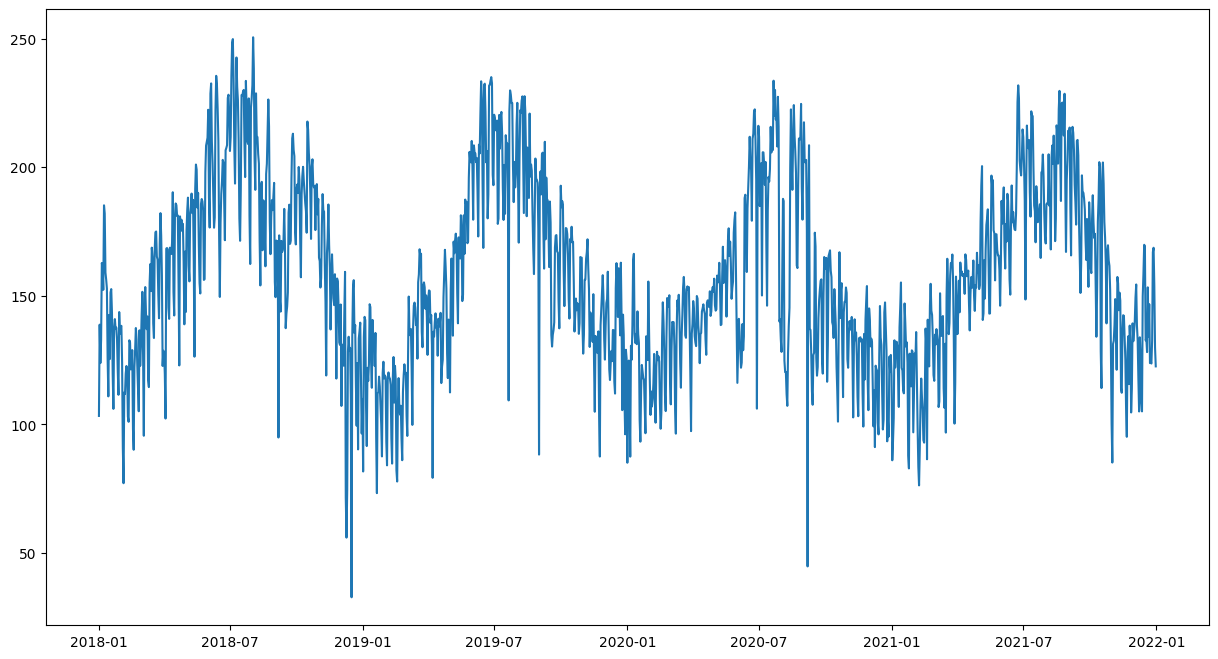

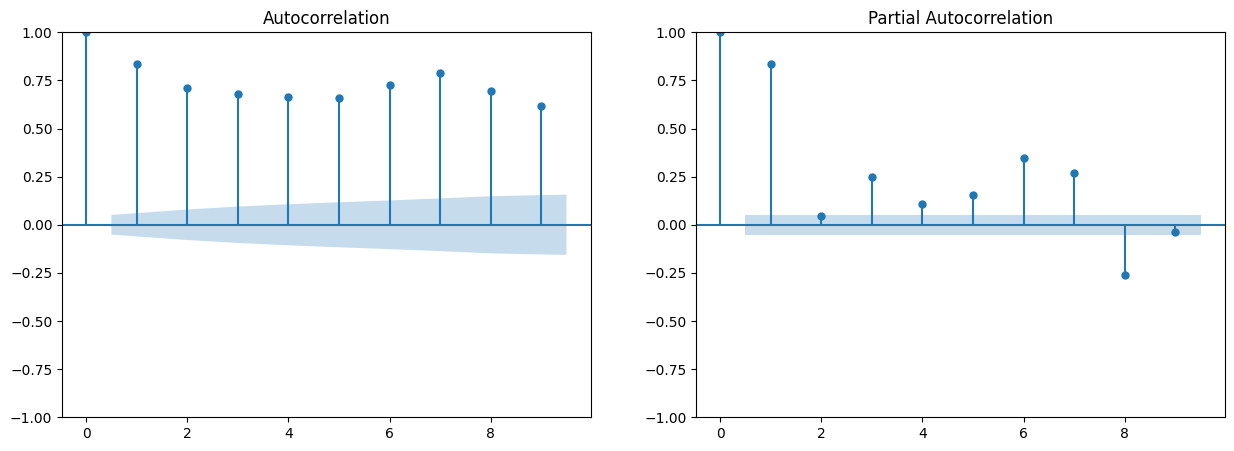

In [19]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.507892
p-value: 0.113566
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [22]:
modelo_ajahuel_d=ARIMA(ys,order=(8,0,8))
m_ad1=modelo_ajahuel_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 217.61592798362523
AIC 12040.618163007679
MAPE 0.07247042711425992


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


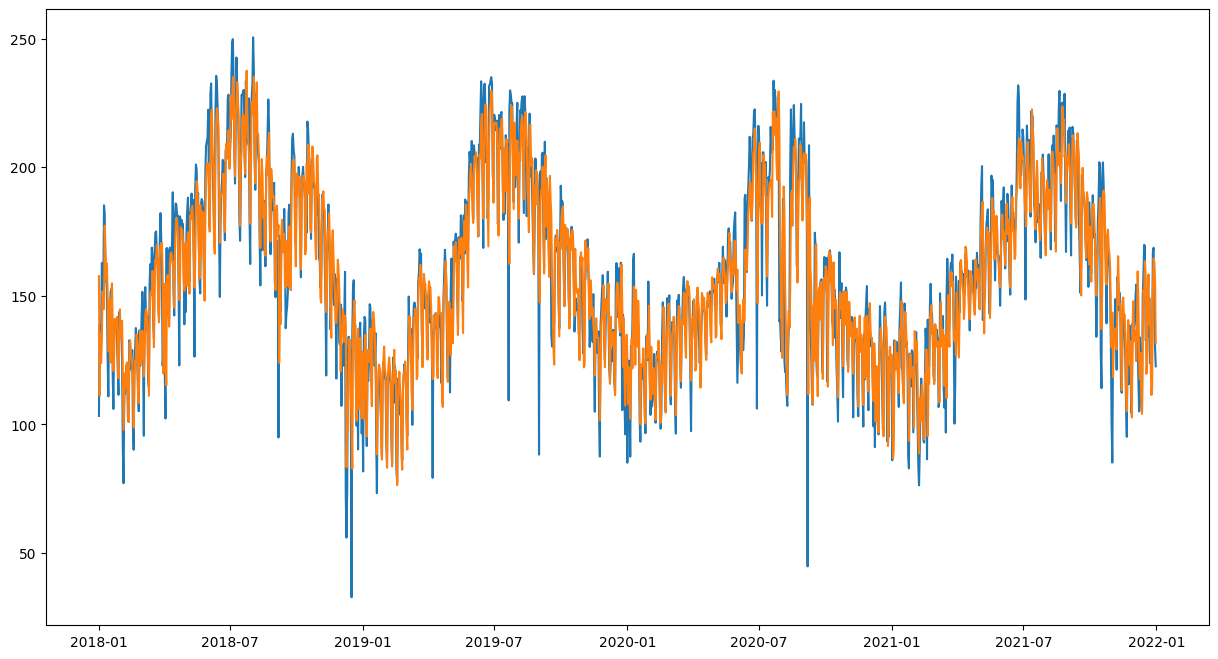

In [23]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

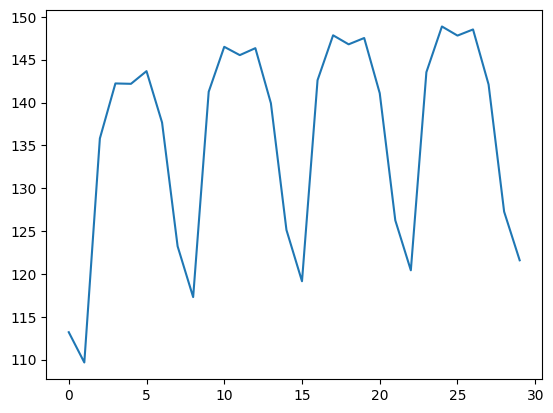

In [24]:
m1_y1_p = m_ad1.get_forecast(steps=30)
m1_y1_ci = m_ad1.conf_int(0.05)
plt.plot(m1_y1_p.predicted_mean)

In [25]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [26]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [27]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

2024-04-13 11:08:48.793384: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [29]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 24882.9121 - mae: 153.5385 - mape: 97.1389 - mse: 24882.9121
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18988.9238 - mae: 132.9746 - mape: 83.3449 - mse: 18988.9238
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13719.8018 - mae: 111.4294 - mape: 68.9436 - mse: 13719.8018
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9065.7842 - mae: 88.1530 - mape: 53.4816 - mse: 9065.7842  
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5328.2900 - mae: 64.0653 - mape: 37.7718 - mse: 5328.2900
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2804.3018 - mae: 42.8547 - mape: 24.9072 - mse: 2804.3018
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1563.4531 - mae: 31.3674 - mape: 19.6556 - mse: 1563.4531
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1295.8198 - mae: 30.0227 - mape: 21.0086 - mse: 1295.8198
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 140

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


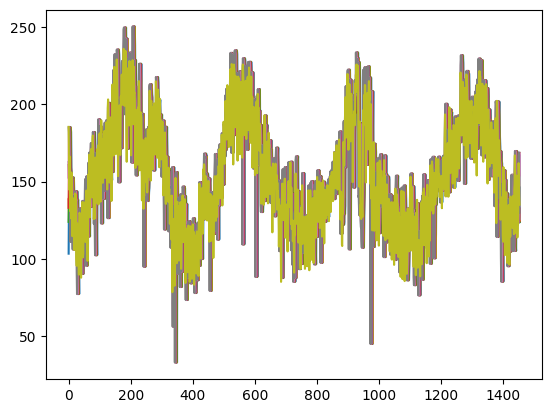

In [31]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
135.12898
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
134.8407
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
133.74101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
139.39407
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
141.52888
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
125.67548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
106.30061
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
121.27548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
123.78857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
125.1815
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
132.47507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
133.1546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
112.681786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
94.931496
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
118.279465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
120.68864
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
122.461914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
129.5931
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
128.19963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
100.861404
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
86

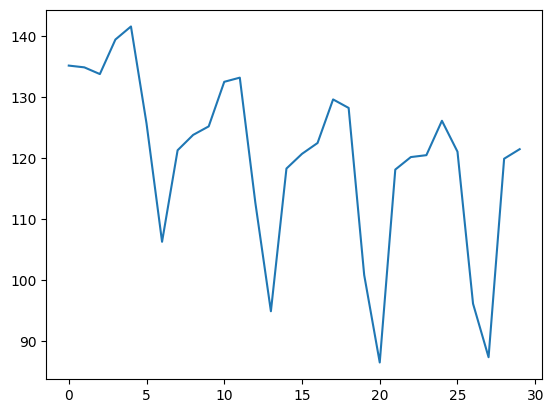

In [32]:
ultimo=list(yw[-1].copy())
forecasts=[]
for i in range(30):
    data=np.array(np.asarray([ultimo]))
    forecast=model.predict(data)
    valor=forecast[0][0]
    print(valor)
    forecasts.append(valor)
    ultimo.pop(0)
    ultimo.append(valor)
plt.plot(forecasts)

Ahora desordenaremos cada batch de entrenamiento para evitar el problema de catastrophic forgetting

In [33]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 481.6299 - mae: 16.1311 - mape: 11.6401 - mse: 481.6299
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 321.2919 - mae: 13.4166 - mape: 9.4356 - mse: 321.2919
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 317.7707 - mae: 13.0818 - mape: 9.4525 - mse: 317.7707
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 309.4569 - mae: 13.1807 - mape: 9.0362 - mse: 309.4569
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 278.2803 - mae: 11.9970 - mape: 8.5156 - mse: 278.2803
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 263.2561 - mae: 11.7644 - mape: 8.1505 - mse: 263.2561
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 247.2372 - mae: 11.3805 - mape: 7.9806 - mse: 247.2372
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 240.7308 - mae: 11.0009 - mape: 7.7295 - mse: 240.7308
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 229.8258 - mae: 10.8343 - mape: 7.613

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


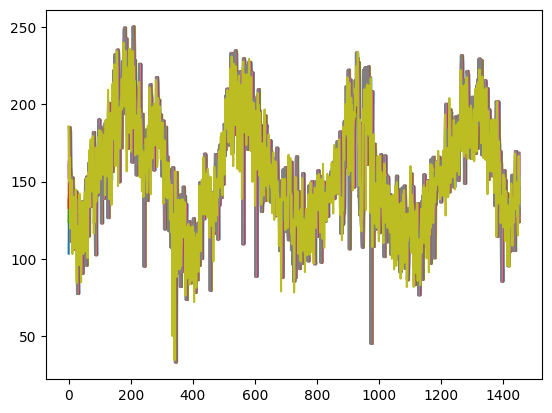

In [34]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
135.9372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
137.74432
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
121.325325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
129.11348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
142.3145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
109.11012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
104.93346
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
124.76506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
118.499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
123.34714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
133.60768
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
134.82631
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
118.3383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
118.595184
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
126.38784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
127.90319
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
137.01932
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
143.29492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
136.4747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
136.74423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
135.51

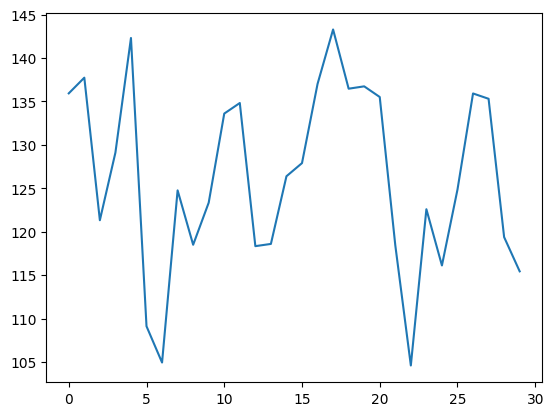

In [35]:
ultimo=list(yw[-1].copy())
forecasts=[]
for i in range(30):
    data=np.array(np.asarray([ultimo]))
    forecast=model.predict(data)
    valor=forecast[0][0]
    print(valor)
    forecasts.append(valor)
    ultimo.pop(0)
    ultimo.append(valor)
plt.plot(forecasts)

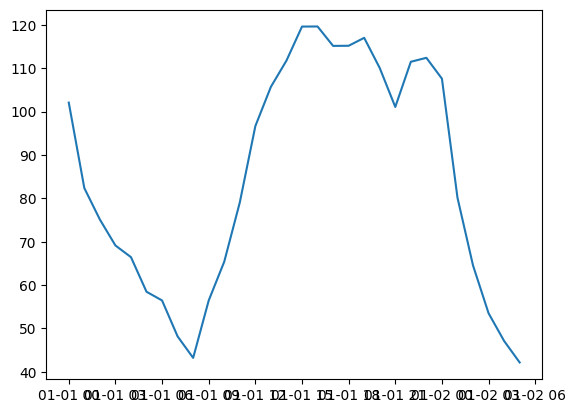

In [38]:
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
plt.plot(xt[:30],yt[:30])